# Predicting Fraudulent Transactions

# Business Context
This case requires trainees to develop a model for predicting fraudulent transactions for a financial company and use insights from the model to develop an actionable plan. Data for the case is available in CSV format having 6362620 rows and 10 columns.

Candidates can use whatever method they wish to develop their machine learning model. Following usual model development procedures, the model would be estimated on the calibration data and tested on the validation data. This case requires both statistical analysis and creativity/judgment. We recommend you spend time on both fine-tuning and interpreting the results of your machine learning model.

## Data Dictionary & Source Acquisition
### Data Dictionary: The data dictionary of the dataset can be found here.
### Data Source: The dataset can be found here.

## Candidate Expectations

### Your task is to execute the process for proactive detection of fraud while answering following questions.
1. Data cleaning including missing values, outliers and multi-collinearity.
2. Describe your fraud detection model in elaboration.
3. How did you select variables to be included in the model?
4. Demonstrate the performance of the model by using best set of tools.
5. What are the key factors that predict fraudulent customer?
6. Do these factors make sense? If yes, How? If not, How not?
7. What kind of prevention should be adopted while company update its infrastructure?
8. Assuming these actions have been implemented, how would you determine if they work

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Importing required packages

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix,ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split, cross_val_score, KFold, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
import time

# Import library for VIF (VARIANCE INFLATION FACTOR)
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [3]:
df = pd.read_csv('/content/drive/MyDrive/Dataset/Fraud.csv')
df

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0,0
...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.00,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.00,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.00,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.00,C2080388513,0.00,0.00,1,0


In [4]:
df.shape

(6362620, 11)

In [5]:
df1 = df.copy()

## Data cleaning including missing values, outliers and multi-collinearity.

In [6]:
df1.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [7]:
df1 = df1.drop_duplicates()

In [8]:
df1.shape

(6362620, 11)

## Here i checked the missing values. Here's no null values and duplicates values.

## Checking outliers

In [9]:
Q1 = df1.quantile(0.25)
Q3 = df1.quantile(0.75)
IQR = Q3 - Q1
(( df1 < (Q1 - 1.5 * IQR)) | (df1>(Q3+1.5*IQR))).sum()  # It gives the no.of Outliers

<ipython-input-9-af874ff1b364>:1: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Q1 = df1.quantile(0.25)
<ipython-input-9-af874ff1b364>:2: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Q3 = df1.quantile(0.75)
<ipython-input-9-af874ff1b364>:4: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  (( df1 < (Q1 - 1.5 * IQR)) | (df1>(Q3+1.5*IQR))).sum()  # It gives the no.of Outliers


amount             338078
isFlaggedFraud         16
isFraud              8213
nameDest                0
nameOrig                0
newbalanceDest     738527
newbalanceOrig    1053391
oldbalanceDest     786135
oldbalanceOrg     1112507
step               102688
type                    0
dtype: int64

(array([0, 1, 2, 3, 4, 5, 6, 7]),
 [Text(0, 0, 'step'),
  Text(1, 0, 'amount'),
  Text(2, 0, 'oldbalanceOrg'),
  Text(3, 0, 'newbalanceOrig'),
  Text(4, 0, 'oldbalanceDest'),
  Text(5, 0, 'newbalanceDest'),
  Text(6, 0, 'isFraud'),
  Text(7, 0, 'isFlaggedFraud')])

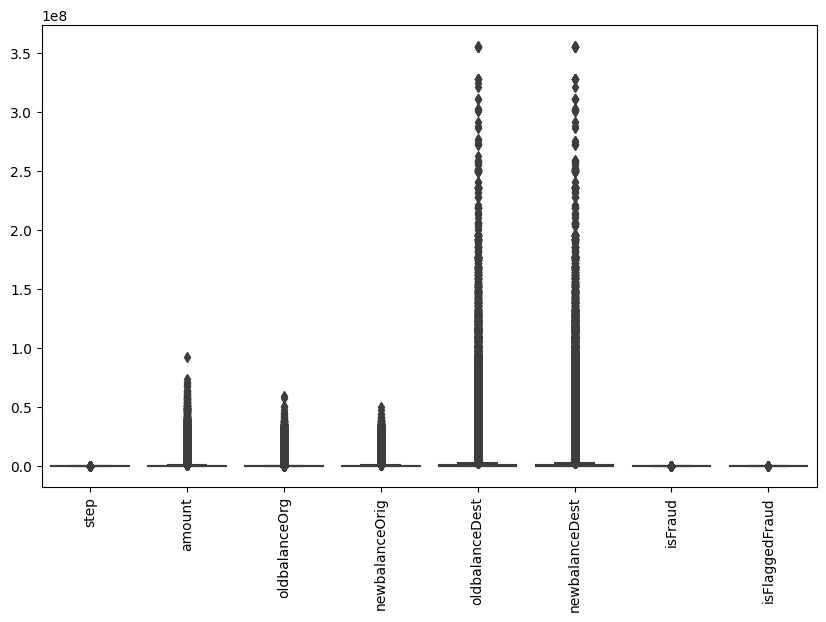

In [10]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df1)
plt.xticks(rotation=90)

## We can see in this dataset there are many outliers. So we've to clip the data

In [11]:
df1['isFraud'].value_counts(), df1['isFlaggedFraud'].value_counts()

(0    6354407
 1       8213
 Name: isFraud, dtype: int64,
 0    6362604
 1         16
 Name: isFlaggedFraud, dtype: int64)

In [12]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 582.5+ MB


## Encode the Non Numerical Data

In [13]:
#object_list, df1.info()

In [14]:
#df1['isFraud'].value_counts(), df1['isFlaggedFraud'].value_counts()

In [15]:
one_hot = pd.get_dummies(df['type'])
df1 = df.drop(['type'], axis=1)
df1 = df1.join(one_hot)
df1

,step,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,CASH_IN,CASH_OUT,DEBIT,PAYMENT,TRANSFER
0,1,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0,0,0,0,0,1,0
1,1,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0,0,0,0,0,1,0
2,1,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1,0,0,0,0,0,1
3,1,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1,0,0,1,0,0,0
4,1,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,339682.13,C786484425,339682.13,0.00,C776919290,0.00,339682.13,1,0,0,1,0,0,0
6362616,743,6311409.28,C1529008245,6311409.28,0.00,C1881841831,0.00,0.00,1,0,0,0,0,0,1
6362617,743,6311409.28,C1162922333,6311409.28,0.00,C1365125890,68488.84,6379898.11,1,0,0,1,0,0,0
6362618,743,850002.52,C1685995037,850002.52,0.00,C2080388513,0.00,0.00,1,0,0,0,0,0,1


In [16]:
df2 = df1.copy()
# print(df1)

# Checking how many attributes are dtype: object

object_list = df2.select_dtypes(include = "object").columns
object_list

#Label Encoding for object to numeric conversion
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

for fe in object_list:
    df2[fe] = le.fit_transform(df2[fe].astype(str))
df2.info()

df3 = df2.copy()
#df2 = df1.drop(['isFraud','isFlaggedFraud'], axis=1)
# y = df1['isFraud']
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=3)
# print(X_train.shape)
# print(X_test.shape)
# print(y_train.shape)
# print(y_test.shape)
df3

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 15 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   amount          float64
 2   nameOrig        int64  
 3   oldbalanceOrg   float64
 4   newbalanceOrig  float64
 5   nameDest        int64  
 6   oldbalanceDest  float64
 7   newbalanceDest  float64
 8   isFraud         int64  
 9   isFlaggedFraud  int64  
 10  CASH_IN         uint8  
 11  CASH_OUT        uint8  
 12  DEBIT           uint8  
 13  PAYMENT         uint8  
 14  TRANSFER        uint8  
dtypes: float64(5), int64(5), uint8(5)
memory usage: 515.8 MB


,step,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,CASH_IN,CASH_OUT,DEBIT,PAYMENT,TRANSFER
0,1,9839.64,757869,170136.00,160296.36,1662094,0.00,0.00,0,0,0,0,0,1,0
1,1,1864.28,2188998,21249.00,19384.72,1733924,0.00,0.00,0,0,0,0,0,1,0
2,1,181.00,1002156,181.00,0.00,439685,0.00,0.00,1,0,0,0,0,0,1
3,1,181.00,5828262,181.00,0.00,391696,21182.00,0.00,1,0,0,1,0,0,0
4,1,11668.14,3445981,41554.00,29885.86,828919,0.00,0.00,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,339682.13,5651847,339682.13,0.00,505863,0.00,339682.13,1,0,0,1,0,0,0
6362616,743,6311409.28,1737278,6311409.28,0.00,260949,0.00,0.00,1,0,0,0,0,0,1
6362617,743,6311409.28,533958,6311409.28,0.00,108224,68488.84,6379898.11,1,0,0,1,0,0,0
6362618,743,850002.52,2252932,850002.52,0.00,319713,0.00,0.00,1,0,0,0,0,0,1


In [17]:
object_list

Index(['nameOrig', 'nameDest'], dtype='object')

In [18]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 15 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   amount          float64
 2   nameOrig        int64  
 3   oldbalanceOrg   float64
 4   newbalanceOrig  float64
 5   nameDest        int64  
 6   oldbalanceDest  float64
 7   newbalanceDest  float64
 8   isFraud         int64  
 9   isFlaggedFraud  int64  
 10  CASH_IN         uint8  
 11  CASH_OUT        uint8  
 12  DEBIT           uint8  
 13  PAYMENT         uint8  
 14  TRANSFER        uint8  
dtypes: float64(5), int64(5), uint8(5)
memory usage: 515.8 MB


In [19]:
df4 = df3.astype('float64')

In [20]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 15 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            float64
 1   amount          float64
 2   nameOrig        float64
 3   oldbalanceOrg   float64
 4   newbalanceOrig  float64
 5   nameDest        float64
 6   oldbalanceDest  float64
 7   newbalanceDest  float64
 8   isFraud         float64
 9   isFlaggedFraud  float64
 10  CASH_IN         float64
 11  CASH_OUT        float64
 12  DEBIT           float64
 13  PAYMENT         float64
 14  TRANSFER        float64
dtypes: float64(15)
memory usage: 728.1 MB


In [21]:
df4.columns

Index(['step', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud', 'CASH_IN', 'CASH_OUT', 'DEBIT', 'PAYMENT',
       'TRANSFER'],
      dtype='object')

In [22]:
df5 = df4.copy()

In [23]:
def capp(df, cols):
  for col in cols:
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1
    up = q3 + (1.5*iqr)
    low = q1 - (1.5*iqr)
    df[col] = np.where(df[col]>up, up, np.where(df[col]<low, low, df[col]))
df2.columns
cols = df5.columns
capp(df5, cols)


In [24]:
# df2.columns, df['isFraud'].value_counts()

In [25]:
q1 = df5.quantile(0.25)
q3 = df5.quantile(0.75)
iqr = q3 - q1
((df5 < (q1 - 1.5 * iqr))|(df5 > (q3 +1.5*iqr))).sum()

step              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
CASH_IN           0
CASH_OUT          0
DEBIT             0
PAYMENT           0
TRANSFER          0
dtype: int64

## Here we can see the clipped data. there is no outliers.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 [Text(0, 0, 'step'),
  Text(1, 0, 'amount'),
  Text(2, 0, 'nameOrig'),
  Text(3, 0, 'oldbalanceOrg'),
  Text(4, 0, 'newbalanceOrig'),
  Text(5, 0, 'nameDest'),
  Text(6, 0, 'oldbalanceDest'),
  Text(7, 0, 'newbalanceDest'),
  Text(8, 0, 'isFraud'),
  Text(9, 0, 'isFlaggedFraud'),
  Text(10, 0, 'CASH_IN'),
  Text(11, 0, 'CASH_OUT'),
  Text(12, 0, 'DEBIT'),
  Text(13, 0, 'PAYMENT'),
  Text(14, 0, 'TRANSFER')])

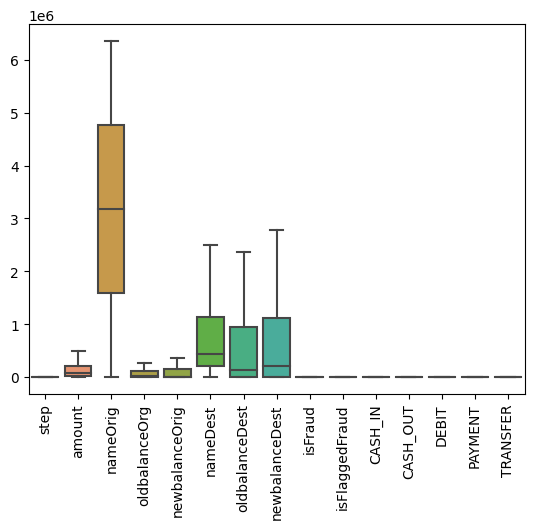

In [26]:
sns.boxplot(data=df5)
plt.xticks(rotation=90)

In [27]:
df5['isFlaggedFraud'].unique()

array([0.])

In [28]:
df4['isFlaggedFraud'].value_counts()

0.0    6362604
1.0         16
Name: isFlaggedFraud, dtype: int64

In [29]:
print(df4['isFraud'].unique())
print(df4['isFraud'].value_counts())

[0. 1.]
0.0    6354407
1.0       8213
Name: isFraud, dtype: int64


In [30]:
df4['isFraud'].value_counts()[0]

6354407

In [31]:
(df4['isFraud'].value_counts()[0] * 100) / (len(df4['isFraud']))

99.87091795518198

In [32]:
(df4['isFlaggedFraud'].value_counts()[0] * 100) / (len(df4['isFlaggedFraud']))

99.99974853126542

In [33]:
df4.describe().T

,count,mean,std,min,25%,50%,75%,max
step,6362620.0,2.433972e+02,1.423320e+02,1.0,156.00,239.000,3.350000e+02,7.430000e+02
amount,6362620.0,1.798619e+05,6.038582e+05,0.0,13389.57,74871.940,2.087215e+05,9.244552e+07
nameOrig,6362620.0,3.176678e+06,1.834064e+06,0.0,1588331.75,3176672.500,4.765048e+06,6.353306e+06
oldbalanceOrg,6362620.0,8.338831e+05,2.888243e+06,0.0,0.00,14208.000,1.073152e+05,5.958504e+07
newbalanceOrig,6362620.0,8.551137e+05,2.924049e+06,0.0,0.00,0.000,1.442584e+05,4.958504e+07
nameDest,6362620.0,7.464270e+05,7.502455e+05,0.0,216895.00,432289.000,1.132509e+06,2.722361e+06
oldbalanceDest,6362620.0,1.100702e+06,3.399180e+06,0.0,0.00,132705.665,9.430367e+05,3.560159e+08
newbalanceDest,6362620.0,1.224996e+06,3.674129e+06,0.0,0.00,214661.440,1.111909e+06,3.561793e+08
isFraud,6362620.0,1.290820e-03,3.590480e-02,0.0,0.00,0.000,0.000000e+00,1.000000e+00
isFlaggedFraud,6362620.0,2.514687e-06,1.585775e-03,0.0,0.00,0.000,0.000000e+00,1.000000e+00


In [34]:
## Multicolinearity

# def calc_vif(df):
#   # Calculating VIF
#   vif = pd.DataFrame()
#   vif["variables"] = df.columns
#   vif["VIF"] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
#   return(vif)

# calc_vif(df5)

We can see that oldbalanceOrg and newbalanceOrig have too high VIF thus they are highly correlated. Similarly oldbalanceDest and newbalanceDest, also nameDest is connected to nameOrig.

Thus combine these pairs of colinear attributes and drop the individual ones.

In [35]:
# df1['Actual_amount_orig'] = df1.apply(lambda x: x['oldbalanceOrg'] - x['newbalanceOrig'], axis=1)
# df1['Actual_amount_dest'] = df1.apply(lambda x: x['oldbalanceDest'] - x['newbalanceDest'], axis=1)
# df1['TransactionPath'] = df1.apply(lambda x: x['nameOrig'] + x['nameDest'], axis=1)

In [36]:
# #Dropping columns

df6 = df5.drop(['isFraud','isFlaggedFraud'],axis=1)

# calc_vif(df6)

<Axes: >

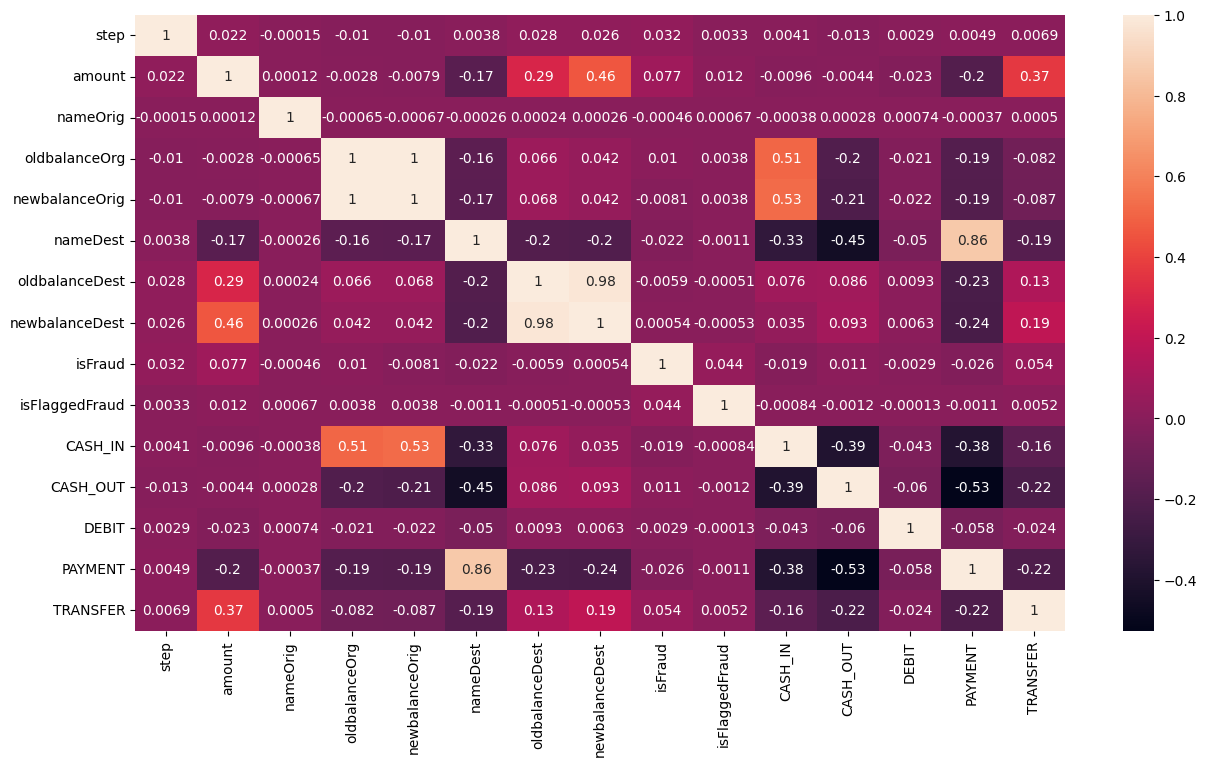

In [37]:
corr = df4.corr()

plt.figure(figsize=(15, 8))
sns.heatmap(corr, annot=True)

## How did you select variables to be included in the model?

Using the VIF values and correlation heatmap. We just need to check if there are any two attributes highly negetively correlated to each other and then drop the one which is less correlated.

## Model Building

In [38]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
import itertools
from collections import Counter
import sklearn.metrics as metrics
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

In [39]:
# Perform Scaling
scaler = StandardScaler()
#df4["NormalizedAmount"] = scaler.fit_transform(df4["amount"])
#df4.drop(["amount"], inplace= True, axis= 1)

X = df4.drop(["isFraud"], axis= 1)
y = df4["isFraud"]

## Here we can see the dataset is imbalanced. We have to balance the data. so we're going to use Synthetic Minority Over Sampling Techniques (SMOTE).

In [40]:
from imblearn.over_sampling import SMOTE, RandomOverSampler

In [41]:
smote = SMOTE()
ros = RandomOverSampler()

X_resampled, y_resampled = smote.fit_resample(X,y)
#X_resampled.shape, y_resampled.shape

# X_resampled, y_resampled = ros.fit_resample(X,y)

# # Print the resampled data
# resampled_data = pd.concat([pd.DataFrame(X_resampled, columns=X.columns), pd.Series(y_resampled, name='Churn')], axis=1)
# print(resampled_data)

X_resampled.shape, y_resampled.shape

((12708814, 14), (12708814,))

## Splittig the data

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.33, random_state=33)

##Baseline Algorithm Checking

---

From the dataset, we will analysis and build a model to predict if a given set of symptoms lead to breast cancer.

This is a binary classification problem, and a few algorithms are appropriate for use.

Since we do not know which one will perform the best at the point, we will do a quick test on the few appropriate algorithms with default setting to get an early indication of how each of them perform.

We will use 10 fold cross validation for each testing.

---



The following linear algorithms will be used, namely:

**Decision Tree Classifier (Classification and Regression Trees (CART))**


**Random Forest Classifier**

## Decision tree (Classification and Regression Tree-CART)

In [43]:
# Instantiate a DecisionTreeClassifier 'dt' with a maximum depth
dt = DecisionTreeClassifier(criterion='gini', max_depth=4, random_state=3)

# Fit dt to the training set
dt.fit(X_train, y_train) # it will ask all possible questions, compute the information gain and choose the best split

# Predict test set labels
y_pred = dt.predict(X_test)
y_pred
#print(y_pred[0:5])

array([1., 0., 0., ..., 0., 1., 1.])

In [44]:
# plt.figure(figsize=(20,20))
# features = df.columns
# classes = ['isFlaggedfraud','isFraud']
# tree.plot_tree(dt,feature_names=features,class_names=classes,filled=True)
# plt.show()

In [45]:
y_train_pred = dt.predict(X_train)

Train score 0.9745985422033482
Test score 0.9746756546219768
Train Confusion matrix


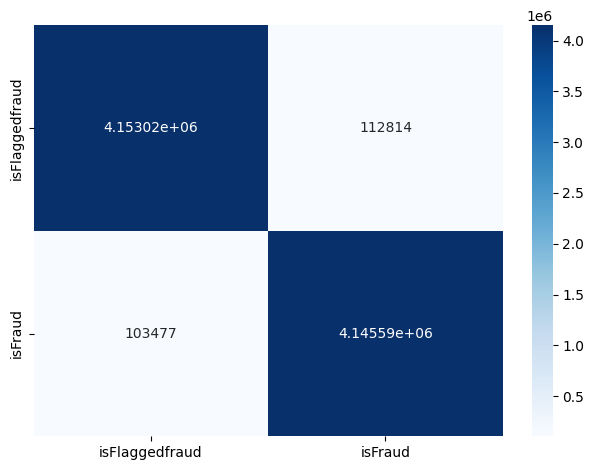

Test Confusion matrix


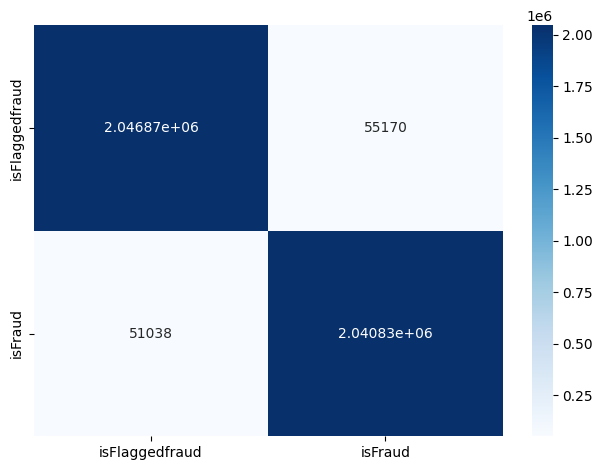

In [46]:
classes = ['isFlaggedfraud','isFraud']

# helper function
def plot_confusionmatrix(y_train_pred,y_train,dom):
    print(f'{dom} Confusion matrix')
    cf = confusion_matrix(y_train_pred,y_train)
    sns.heatmap(cf,annot=True,yticklabels=classes
               ,xticklabels=classes,cmap='Blues', fmt='g')
    plt.tight_layout()
    plt.show()
print(f'Train score {accuracy_score(y_train_pred,y_train)}')
print(f'Test score {accuracy_score(y_pred,y_test)}')
plot_confusionmatrix(y_train_pred,y_train,dom='Train')
plot_confusionmatrix(y_pred,y_test,dom='Test')

In [47]:
print("Accuracy score %f" % accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy score 0.974676
              precision    recall  f1-score   support

         0.0       0.97      0.98      0.97   2097906
         1.0       0.98      0.97      0.97   2096003

    accuracy                           0.97   4193909
   macro avg       0.97      0.97      0.97   4193909
weighted avg       0.97      0.97      0.97   4193909



Test set accuracy: 0.97
Test set auc: 0.97


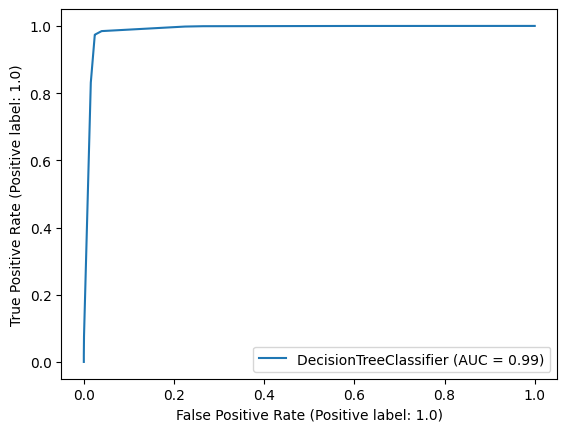

In [48]:
from sklearn.metrics import accuracy_score, roc_auc_score, RocCurveDisplay
#we compute the eval metric on test/validation set only primarily

# # Predict test set labels
# y_pred = dt.predict(X_test) # Model's predictions

# Compute test set accuracy
acc = accuracy_score(y_test, y_pred)
print("Test set accuracy: {:.2f}".format(acc))
acc = roc_auc_score(y_test, y_pred)
print("Test set auc: {:.2f}".format(acc))
RocCurveDisplay.from_estimator(dt, X_test, y_test)


# acc = roc_auc_score(y_train, dt.predict(X_train))
# print("Train set AUC : ", acc)

In [65]:
# Visualize data
from sklearn import tree
import graphviz
from sklearn.tree import export_graphviz
from six import StringIO
import pydotplus
import matplotlib.image as mpimg
%matplotlib inline

In [59]:
df7 = df5.drop(['isFraud'],axis=1)

In [63]:
df7.head()

,step,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFlaggedFraud,CASH_IN,CASH_OUT,DEBIT,PAYMENT,TRANSFER
0,1.0,9839.64,757869.0,170136.0,160296.36,1662094.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1.0,1864.28,2188998.0,21249.0,19384.72,1733924.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,1.0,181.00,1002156.0,181.0,0.00,439685.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,181.00,5828262.0,181.0,0.00,391696.0,21182.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,1.0,11668.14,3445981.0,41554.0,29885.86,828919.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [67]:


# Visualize the decision tree
dot_data = export_graphviz(dt, out_file=None,
                           feature_names=df7.columns,
                           class_names=['Not Fraud', 'Fraud'],
                           filled=True, rounded=True,
                           special_characters=True)

graph = graphviz.Source(dot_data)
graph.render("/content/drive/MyDrive/Tasks/INSAID/Fraud")  # Save the tree as 'decision_tree.pdf'

'/content/drive/MyDrive/Tasks/INSAID/Fraud.pdf'

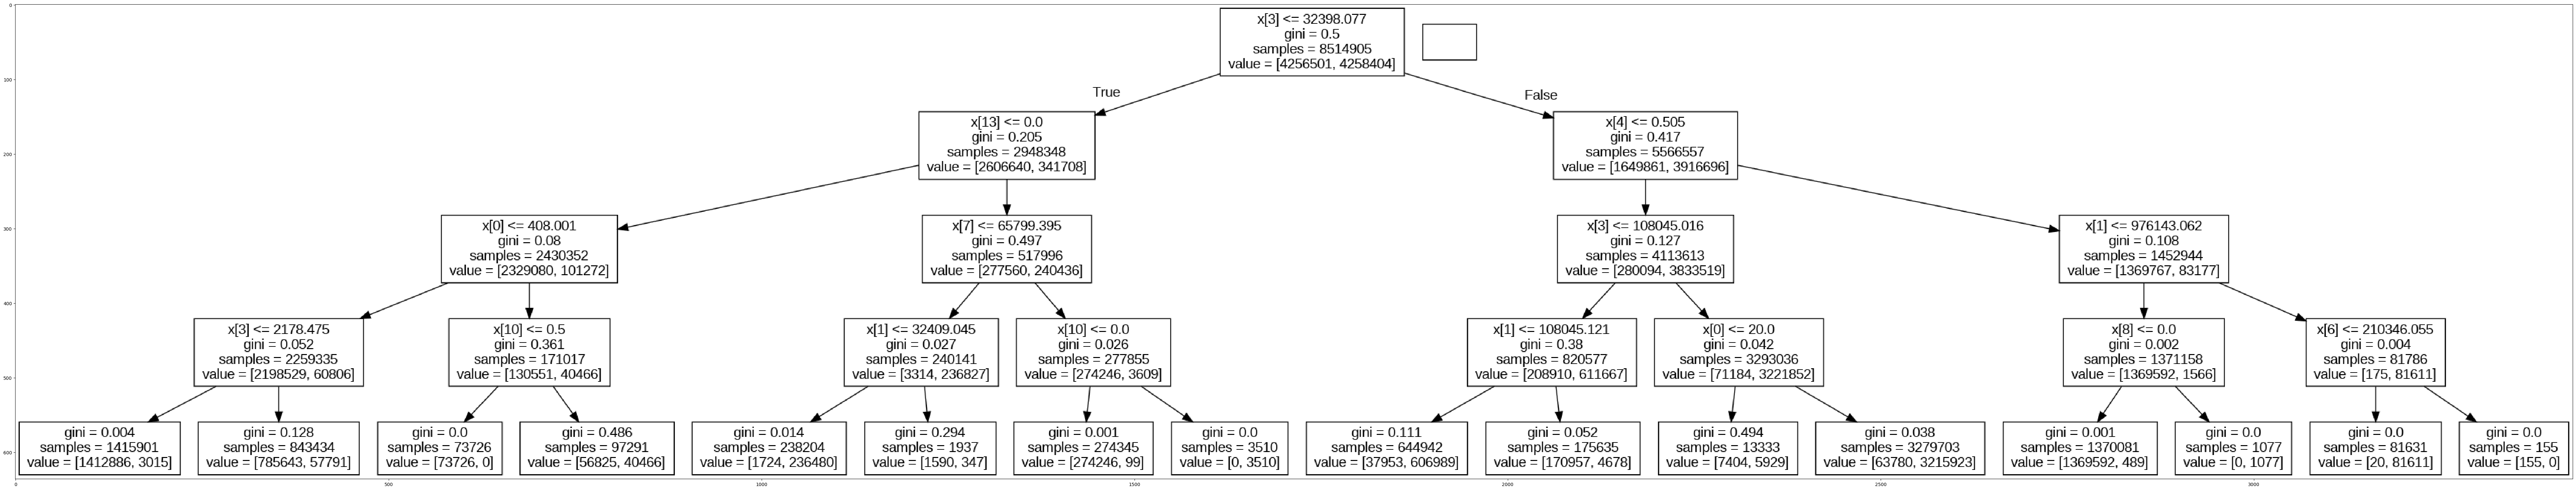

In [75]:
dot_data = StringIO()
filename = "/content/drive/MyDrive/Tasks/INSAID/Fraud.png"

dotfile = StringIO()
tree.export_graphviz(dt, out_file=dotfile)
graph=pydotplus.graph_from_dot_data(dotfile.getvalue())
graph.write_png("/content/drive/MyDrive/Tasks/INSAID/Fraud.png")

# graph.write_png(filename)
img = mpimg.imread(filename)
plt.figure(figsize=(100, 200))
plt.imshow(img,interpolation='nearest')

## Random Forest

In [76]:
rfc = RandomForestClassifier(n_estimators = 10, criterion='entropy', random_state=0)
rfc.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=0)

In [77]:
# Predict the Test set results
y_pred_rfc = rfc.predict(X_train)
y_pred_1 = rfc.predict(X_test)

Train score 0.9999821489494011
Test score 0.9995231179312665
Train Confusion matrix
[[4256372      23]
 [    129 4258381]]


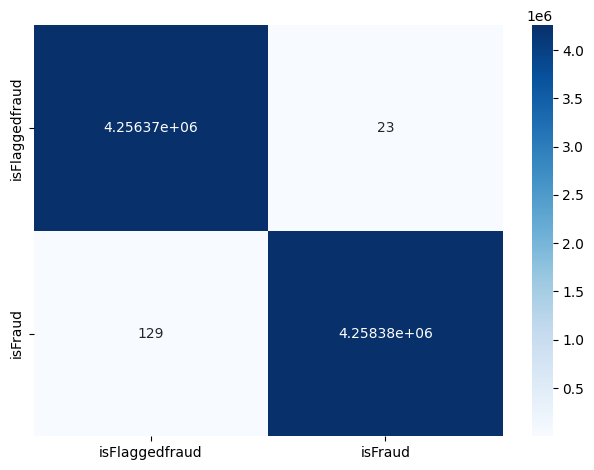

Test Confusion matrix
[[2046868   55170]
 [  51038 2040833]]


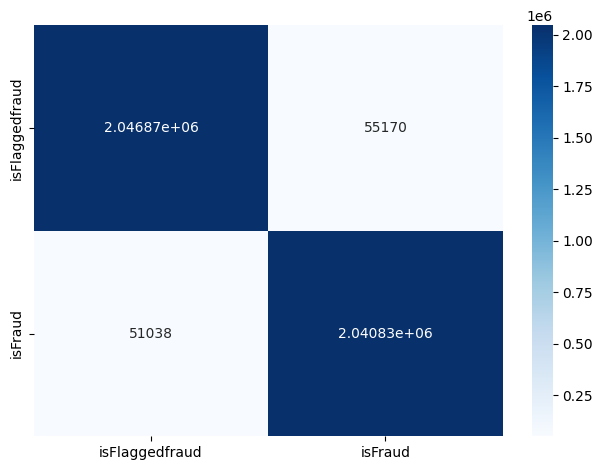

In [78]:
# helper function
def plot_confusionmatrix(y_train_pred,y_train,dom):
    print(f'{dom} Confusion matrix')
    cf = confusion_matrix(y_train_pred,y_train)
    print(cf)
    sns.heatmap(cf,annot=True,yticklabels=classes
               ,xticklabels=classes,cmap='Blues', fmt='g')
    plt.tight_layout()
    plt.show()
print(f'Train score {accuracy_score(y_pred_rfc, y_train)}')
print(f'Test score {accuracy_score(y_pred_1, y_test)}')
plot_confusionmatrix(y_pred_rfc,y_train,dom='Train')
plot_confusionmatrix(y_pred,y_test,dom='Test')

## Here, we have build the Random Forest Classifier model with default parameter of n_estimators = 10

In [79]:
# view the feature scores
feature_scores = pd.Series(rfc.feature_importances_, index=X_train.columns).sort_values(ascending=False)
feature_scores

oldbalanceOrg     0.285670
amount            0.113437
newbalanceOrig    0.103450
TRANSFER          0.091050
newbalanceDest    0.074379
CASH_IN           0.066460
nameDest          0.063457
PAYMENT           0.062996
step              0.057543
oldbalanceDest    0.039691
CASH_OUT          0.035071
nameOrig          0.005786
DEBIT             0.000655
isFlaggedFraud    0.000355
dtype: float64

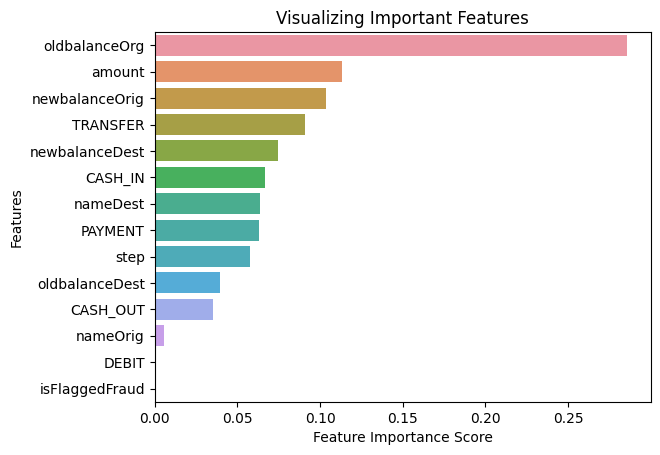

In [80]:
# Creating a seaborn bar plot
sns.barplot(x=feature_scores, y=feature_scores.index)

# Add labels to the graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')

# Add title to the graph
plt.title("Visualizing Important Features")

# Visualize the graph
plt.show()

In [81]:
print(classification_report(y_test, y_pred_1))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00   2097906
         1.0       1.00      1.00      1.00   2096003

    accuracy                           1.00   4193909
   macro avg       1.00      1.00      1.00   4193909
weighted avg       1.00      1.00      1.00   4193909



Test set accuracy: 1.00
Test set auc: 1.00


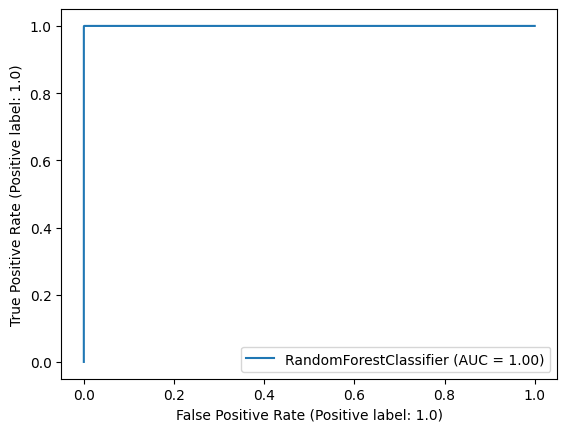

In [82]:
#we compute the eval metric on test/validation set only primarily

# Predict test set labels
#y_pred1 = rfc.predict(X_test) # Model's predictions

# Compute test set accuracy
acc1 = accuracy_score(y_test, y_pred_1)
print(f"Test set accuracy: {acc1:.2f}")
acc2 = roc_auc_score(y_test, y_pred_1)
print("Test set auc: {:.2f}".format(acc2))
RocCurveDisplay.from_estimator(rfc, X_test, y_test)

## CONCLUSION

Comparing with all model (Random Forest, Decision Tree and KNN), we can say **Random Forest** is the Higher AUC.

So, we can do with this model.

In a this model, very important is instead of predicting normal transactions correctly we want Fraud transactions to be predicted correctly.

This is also one of the reason why Random Forest are used unstead of other algorithms.

Also the reason chosen this model is because of this is a highly unbalanced dataset.

Normal: Fraud :: 99.87 : 0.13

Random forest makes multiple decision trees which makes it easier (although time taking) for model to understand the data in a simpler way since Decision Tree and KNN makes decisions in a boolean way.


## Describe your fraud detection model in elaboration.

---



**Model Overview:** The fraud detection model is built using the Random Forest algorithm, which is an ensemble learning method that combines multiple decision trees to make predictions. Random Forest is known for its ability to handle high-dimensional datasets and provide robust performance in various classification tasks, including fraud detection.

**Data Preparation:** The model requires a dataset that consists of labeled examples where each example represents a transaction or an event, and the label indicates whether it is fraudulent or not. The dataset is preprocessed to handle missing values, outliers, and data inconsistencies.

Categorical variables may be encoded using techniques like one-hot encoding or label encoding.

The data is then split into training and testing sets to evaluate the model's performance on unseen data.

### Demonstrate the performance of the model by using best set of tools

**Model Training:** Train a Random Forest classifier using the training dataset. Random Forest is an ensemble learning method that combines multiple decision trees to make predictions. It is known for its ability to handle high-dimensional datasets and provide robust performance.

**Model Evaluation:** Evaluate the trained model using appropriate evaluation metrics such as accuracy, precision, recall, and F1-score. Additionally, consider using techniques like cross-validation to obtain more reliable estimates of the model's performance.

**Testing:** Apply the trained and optimized model on the testing dataset to assess its performance on unseen data. Calculate and report the evaluation metrics to measure the model's effectiveness in detecting fraudulent transactions.

**Monitoring and Refinement:** Continuously monitor the model's performance in real-world scenarios and refine it as needed. This includes periodically retraining the model on updated data and evaluating its performance to ensure its effectiveness in detecting fraud.


### What are the key factors that predict fraudulent customer?

---

1. **Transaction Behavior:**
2. **Geographical Information:**
3. If there is no evidence that the transaction is taking place, then there may be doubts about this as well.
4. If the background is not available by verifying whether the transaction has been given digital or paper proof, they may be fraudulent customer.
5. Customer Activities: login patterns, multiple failed login attempts, frequent changes to personal information, or suspicious account updates.
6. Relationships between customers can provide insights into fraudulent behavior. Identifying networks of customers involved in fraudulent activities or customers associated with known fraudsters can help identify potential fraud cases.
7. **History of Crime:**
8. **Payment Information:**

9. **Anomaly Detection:**
10. **Blured ID's, Fake KYC (Know Your Customer)**

## Do these factors make sense? If yes, How? If not, How not?


---

Yes, these factors make sense of predicting fraudulent customers.

1. In an account that has been inactive for a long time, if suddenly there is an excessive amount of transaction or limited money continues to be credited.
2. Even if it is legal, Unusual changes in a customer's location, transactions from multiple geographically distant locations within a short time. it can be seen from the fact that the transaction is taking place beyond the limit.
3. If there is no evidence that the transaction is taking place, then there may be doubts about this as well.
4. If the background is not available by verifying whether the transaction has been given digital or paper proof, they may be fraudulent customer.
5. Customer Activities: login patterns, multiple failed login attempts, frequent changes to personal information, or suspicious account updates.
6. Relationships between customers can provide insights into fraudulent behavior. Identifying networks of customers involved in fraudulent activities or customers associated with known fraudsters can help identify potential fraud cases.
7. Historical fraud patterns includes identifying specific transaction types or product categories that are frequently associated with fraud, as well as common patterns in the timing or sequencing of fraudulent activities.
8. Unusual payment methods, frequent changes in payment details, multiple accounts associated with the same payment information, or transactions involving stolen or compromised credit card information.

9. Leveraging anomaly detection techniques can help identify outliers or unusual patterns in customer behavior. Unusual purchase patterns, unexpected changes in spending habits, or abnormal transaction sequences can be identified using anomaly detection techniques.


### What kind of prevention should be adopted while company update its infrastructure?

---

1. **Security:** Ensure that security is a fundamental aspect of the architecture, including network design, access controls, data storage, and encryption.
2. **Access Control and Authentication:** This includes the use of strong passwords and limit access.
3. **Network:** Separating systems and services based on their security requirements, you can minimize the lateral movement of attackers within the network.
4. **Encryption and Protection:** These are sensitive data. Need to properly encrypted in transit. Strong encryption algorithms and protocols to protect data from unauthorized access. We can use Machine Learning Algorithm to monitor and prevent the unauthorized transmission of sensitive data.
5. **Monitoring and Logging:** Monitoring and logging solutions to capture and analyze system logs, network traffic, and security events.
6. **Education and Awareness:** Conduct regular training programs to educate employees about security best practices, such as identifying phishing emails, avoiding suspicious websites, and using secure communication channels.
7. **Incident Response:** An incident response plan that outlines the steps to be taken in the event of a security incident.
8. **Disaster Recovery:** Backup and disaster recovery mechanisms to ensure business continuity in case of infrastructure failures or security breaches.
9. **Third-Party Risk Management:** Evaluate the security practices and policies of third-party vendors or service providers involved in the infrastructure update.
10. **Compliance and Regulatory Considerations:** Ensure that the updated infrastructure adheres to relevant industry regulations and compliance standards, Consider privacy requirements and implement necessary controls to protect personal data.



### Assuming these actions have been implemented, how would you determine if they work?


---

**Security Audits:** Conduct periodic security audits to evaluate the implemented security controls and measures. Engage internal or external security experts to review the infrastructure, conduct vulnerability assessments, penetration testing, and analyze the overall security posture.

**Incident Response and Monitoring:** Monitor security incidents and responses is an effectiveness of preventive measures. Such as unauthorized access attempts, data breaches.

**User Feedback and Awareness:** Seek feedback from employees, system administrators, and users regarding their experience with the updated infrastructure and security measures.
Conduct surveys, interviews, or feedback sessions to gather insights into their perception of the security measures and whether they feel more confident in the system's security.

**Compliance and Audit Reports:** Review compliance reports and audit findings to evaluate adherence to relevant industry regulations and standards.

**Continuous Monitoring:** Implement continuous monitoring of the infrastructure, including real-time log analysis, network traffic monitoring, and threat intelligence feeds.

**Lessons Learned and Improvement Actions:** Regularly conduct lessons learned sessions or post-incident reviews to identify areas for improvement. Use this information to refine security controls, update policies and procedures, and implement necessary improvements.

By employing these evaluation methods, you can gain insights into the effectiveness of the implemented security measures. It is important to have a proactive and continuous approach to security evaluation, ensuring that preventive measures are regularly reviewed, adjusted, and enhanced to address emerging threats and evolving security challenges.